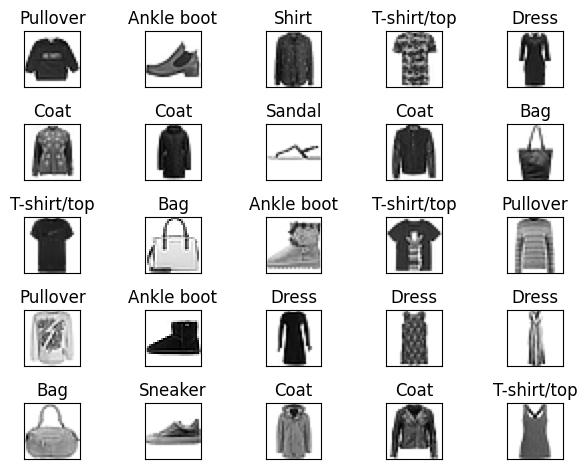

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
96/96 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.6181 - loss: 1.4307 - val_accuracy: 0.1002 - val_loss: 12.6651
Epoch 2/2
96/96 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.8151 - loss: 0.5056 - val_accuracy: 0.1354 - val_loss: 7.8904
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.1329 - loss: 7.9247
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


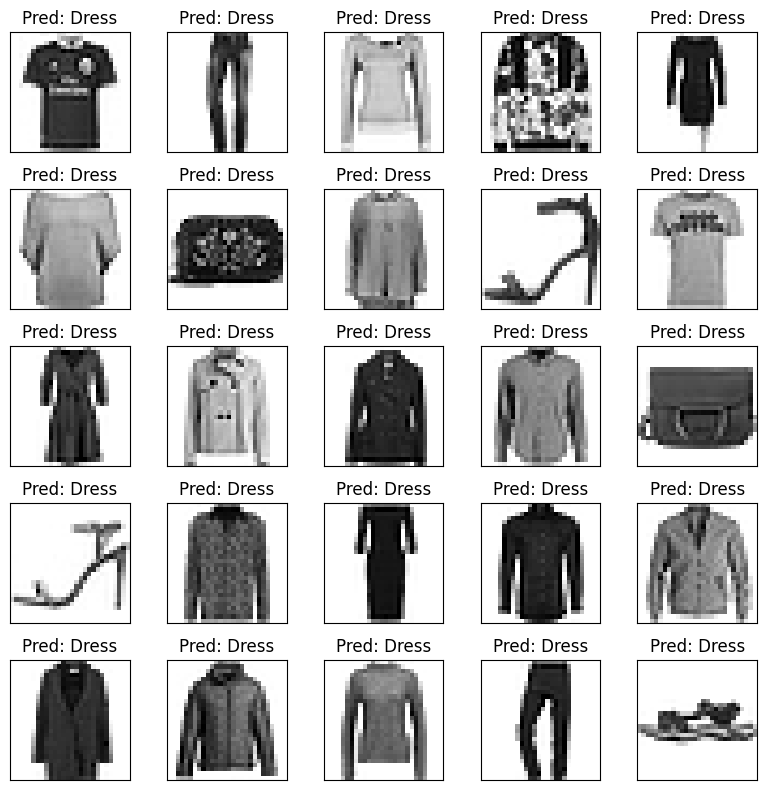

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.19      0.31      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.00      0.00      0.00      1000
       Dress       0.10      1.00      0.19      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.00      0.00      0.00      1000
       Shirt       0.00      0.00      0.00      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.99      0.13      0.23      1000
  Ankle boot       0.00      0.00      0.00      1000

    accuracy                           0.13     10000
   macro avg       0.20      0.13      0.07     10000
weighted avg       0.20      0.13      0.07     10000



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [1]:
import pandas as pd
import numpy as np
train_df=pd.read_csv('C:/Users/HP/Desktop/fashion-mnist_train.csv')
test_df=pd.read_csv('C:/Users/HP/Desktop/fashion-mnist_test.csv')
train_df

classnames=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

x_train=train_df.drop(columns=['label'])
x_test=test_df.drop(columns=['label'])
y_train=train_df['label']
y_test=test_df['label']
x_train=x_train.to_numpy().reshape(x_train.shape[0],28,28,1).astype('float32') / 255.0
x_test=x_test.to_numpy().reshape(x_test.shape[0],28,28,1).astype('float32') / 255.0
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

import matplotlib.pyplot as plt
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]),plt.yticks([]),plt.grid(False)
    plt.imshow(x_train[i],cmap='binary')
    plt.title(classnames[y_train[i]])
plt.tight_layout()
plt.show()

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout,Dense

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=2,batch_size=500,validation_split=0.2)

model.evaluate(x_test,y_test)
y_pred=model.predict(x_test).argmax(axis=-1)

# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([]),plt.yticks([]),plt.grid(False)
#     plt.imshow(x_test[i])
#     plt.title(classnames[y_pred[i]])
# plt.tight_layout()
# plt.show()
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(x_test[i], cmap='binary')
    plt.title(f"Pred: {classnames[y_pred[i]]}")
plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=classnames))